Files already downloaded and verified


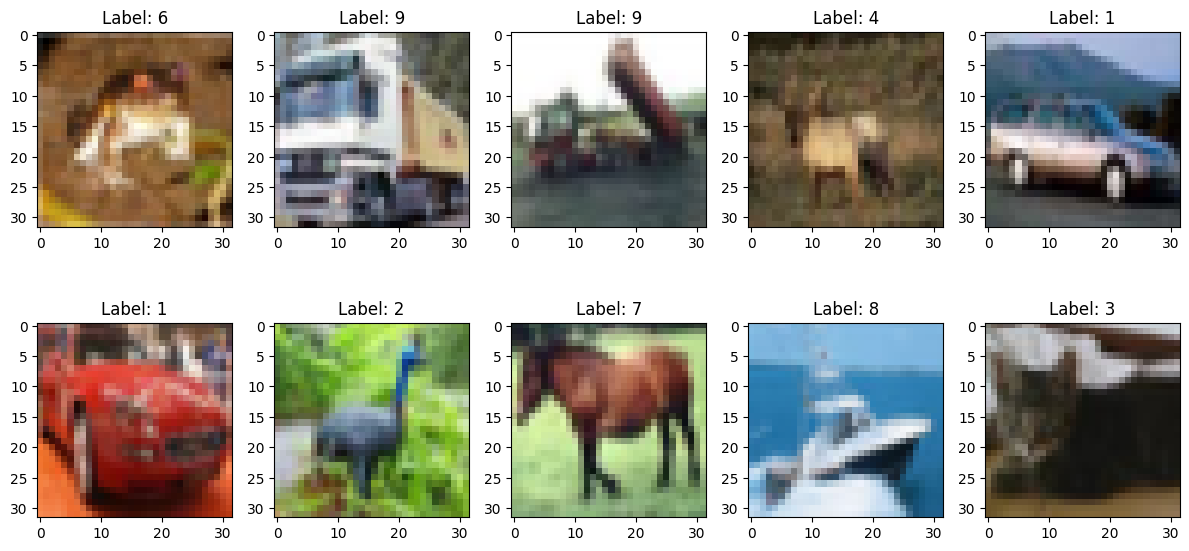


Printing all the class labels of CIFAR10 dataset!

Class 0: airplane
Class 1: automobile
Class 2: bird
Class 3: cat
Class 4: deer
Class 5: dog
Class 6: frog
Class 7: horse
Class 8: ship
Class 9: truck


In [5]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR10 dataset
cifar = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Displaying a few sample images from Dataset CIFAR10
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    image, label = cifar[i]
     # Reshape image tensor from (C, H, W) to (H, W, C)
    image = image.permute(1, 2, 0)
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('on')

plt.tight_layout()
plt.show()

print("\nPrinting all the class labels of CIFAR10 dataset!\n")
# Print all the class labels
class_labels = cifar.classes
for i, label in enumerate(class_labels):
    print(f"Class {i}: {label}")


**Checking For outliers**

***Detect outliers using Local Outlier Factor (LOF) algorithm:***

The LOF algorithm is a popular unsupervised outlier detection technique. It measures the local density of a data point by comparing its distance to its k-nearest neighbors. An anomaly score is assigned to each data point based on the ratio of its local density to the average local density of its neighbors. Data points with lower anomaly scores are considered outliers. LOF takes into account the local characteristics of the data distribution and can be effective in detecting outliers in complex datasets.

*Alogrithm Explanation:*

•	Loads the CIFAR-10 dataset using torchvision's CIFAR10 class and applies a transformation to convert the images to tensors.

•	Randomly selects a sample of images and labels from the CIFAR-10 dataset.



•	Scales the image data by dividing it by 255 to ensure the pixel values are in the range of 0 to 1.

•	Applies the Local Outlier Factor (LOF) algorithm to the image data to detect outliers. LOF is an unsupervised outlier detection algorithm that measures the local density deviation of a data point with respect to its neighbors.

•	It assigns an anomaly score to each data point, where a negative score indicates an outlier.

•	Iterates over each class (0 to 9) and retrieves the outlier images for that class.

•	Displays the outlier images for each class using the plot_images function.
•	Cleans up the variables to free up memory.

*Reference*: https://en.wikipedia.org/wiki/Local_outlier_factor

Class/Feature Label: airplane


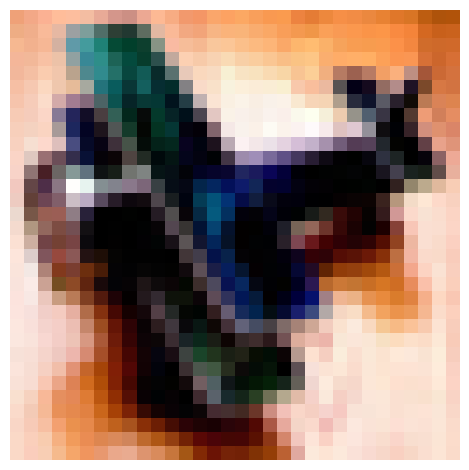

Class/Feature Label: automobile


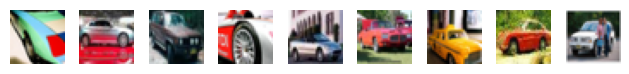

Class/Feature Label: bird


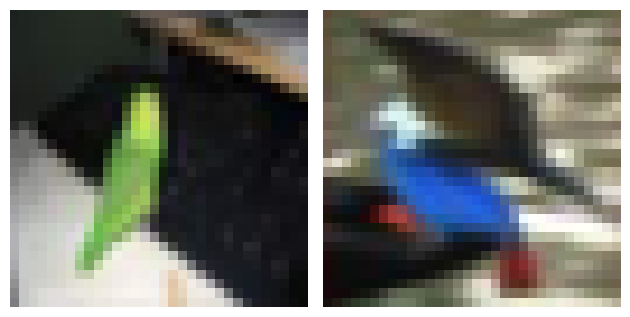

Class/Feature Label: cat


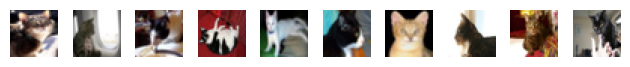

Class/Feature Label: dog


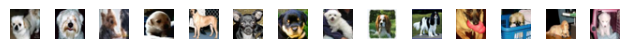

Class/Feature Label: frog


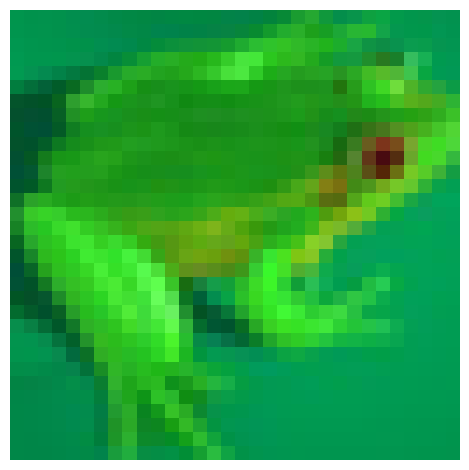

Class/Feature Label: horse


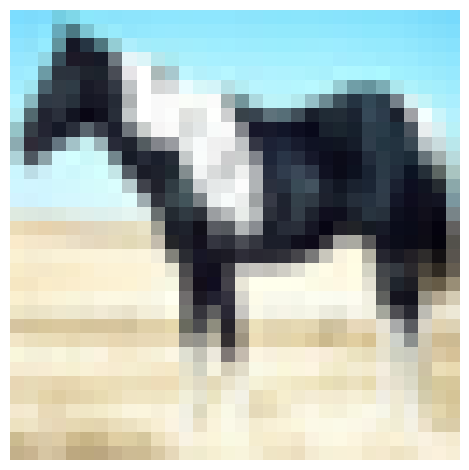

Class/Feature Label: truck


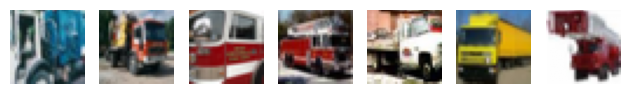

In [6]:
from sklearn.neighbors import LocalOutlierFactor
#  This function plots a row of images using Matplotlib's pyplot. It takes an array of images as input,
#  where each image is represented by a 1D array containing the red, green, and blue values.

def plot_images(imgs: np.ndarray) -> None:
    width = len(imgs)
    height = 1
    fig, axs = plt.subplots(height, width)
    counter = 0
    for ax in np.reshape(axs, -1):
        plot_raw_img(imgs[counter], label=None, ax=ax)
        counter += 1

def plot_raw_img(image, label=None, ax=None):
# This function plots a single image represented as a 3D array with channels for red, green, and blue.
# It takes the image array as input and optionally accepts a label for the image.
# If provided, it can also take an axes object to plot the image on.
    if ax is None:
        ax = plt.gca()
    ax.imshow(image)
    ax.axis('off')
    if label is not None:
        ax.set_title(label)

# Function detects outliers
def detect_outliers(test_size):
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    images = cifar.data
    labels = np.array(cifar.targets)
    np.random.seed(0)
    sample = np.random.choice(len(images), test_size, replace=False)
    imgs = images[sample]
    lbls = labels[sample]
    imgs = imgs / 255.0

    # Assume pixel value between 0-255
    # Finding outliers using  Local Outlier Factor

    LOF = LocalOutlierFactor()
    outliers = np.where(LOF.fit_predict(imgs.reshape(len(imgs), -1)) == -1)[0]
    for i in range(10):
        cat_images = imgs[outliers][lbls[outliers] == i]
        if len(cat_images) == 0:
            continue
        print(f"Class/Feature Label: {cifar.classes[i]}")
        plot_images(cat_images)
        plt.tight_layout()
        plt.show()
    del sample, images, labels, imgs, lbls, outliers

# Setting sample size of 1000 we observe high irregularities in images.
detect_outliers(test_size=1000)


***Observation:***

Based on the observation we found that there can be an issue when we try to do multi-classification because of abrupt cropping factor and unclear background.
These images are created by cropping other pictures, particularly noticeable in the airplane or truck classes. Additionally, some images in the dataset have backgrounds that are not commonly associated with certain classes, such as horse or frog. This variation in backgrounds further contributes to the instability in the classification process.

## DATA PROCESSING

In [7]:
import numpy as np
from skimage.color import rgb2hsv
from skimage.feature import hog
from skimage.transform import resize
from sklearn.decomposition import PCA
import torchvision
import torchvision.transforms as transforms

# Loading the CIFAR10 train and test datasets
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

# Extracting the data
train_data = train_dataset.data
test_data = test_dataset.data
train_labels = train_dataset.targets


Files already downloaded and verified
Files already downloaded and verified


# **HOG Changes**

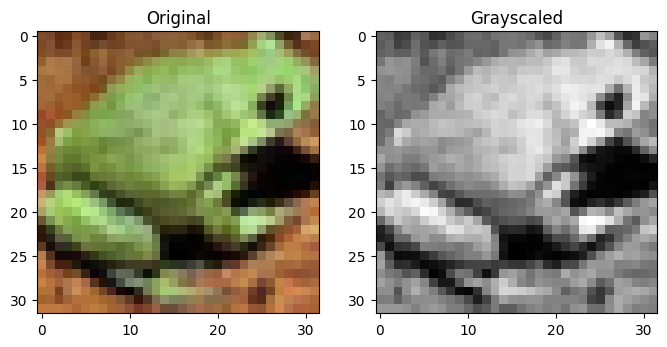

In [8]:
from skimage.color import rgb2gray

# Converting to grayscale
hog_train = rgb2gray(train_data)
hog_test  = rgb2gray(test_data)

# Display difference
frog = train_data[2100]
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(frog)
ax[0].set_title("Original")

frogGray = hog_train[2100]
ax[1].imshow(frogGray, cmap='gray')
ax[1].set_title("Grayscaled");



In [9]:
from skimage.feature import hog
from joblib import Parallel, delayed


# Converts to hog one picture
def to_hog(picture):
    return hog(picture, cells_per_block=(2, 2), pixels_per_cell=(8, 8))


# Convert to hog
hog_train = np.asarray(
    Parallel(n_jobs=-1, batch_size=1000)(delayed(to_hog)(x) for x in hog_train)
)
hog_test = np.asarray(
    Parallel(n_jobs=-1, batch_size=1000)(delayed(to_hog)(x) for x in hog_test)
)

The code utilizes the **skimage.feature** module's hog function to convert images into **Histogram of Oriented Gradients (HOG)** features. The code applies the hog function to each image in the training and test datasets. It does so in parallel using the Parallel and delayed functions from the joblib module, which allows for efficient processing across multiple CPU cores. The resulting HOG features are stored in the hog_train and hog_test arrays, respectively. By converting the images into HOG features, the code aims to extract relevant information about the shape and texture of the objects in the images, which can be beneficial for subsequent classification or detection tasks.

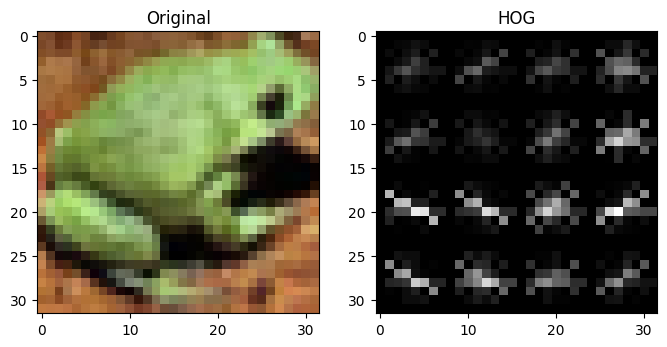

In [10]:
_, hog_horse = hog(frogGray, cells_per_block=(2, 2),
                   pixels_per_cell=(8, 8), visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(frog)
ax[0].set_title("Original")

ax[1].imshow(hog_horse, cmap='gray')
ax[1].set_title("HOG");

In [11]:
# Verfying if we have correct imported training labels from datset or not
print(train_labels)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

In [12]:
hog_train.shape

(50000, 324)

In [13]:
# Eventually we can clean in-future-unused variables
del train_data

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_features": [None, "auto", "log2"],
    "max_depth": [20, 50, 100, 200, 300],
    "min_samples_split": [10, 100, 500, 1000],
    "min_samples_leaf": [10, 100, 200, 500, 1000]
}

#We use 5 fold classification here, repeating the process
# n_iter specifies the number of iterations or random combinations of hyperparameters to try during the search.
gridSearchHogVal = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    n_iter=20,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    refit=True,
    verbose=4,
    random_state=42,
)

gridSearchHogVal.fit(hog_train, train_labels)
hog_tree = gridSearchHogVal.best_estimator_  # Save the best estimator

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [16]:

gridSearchHogVal.best_score_

0.30666000000000004

In [17]:
gridSearchHogVal.best_params_

{'min_samples_split': 100,
 'min_samples_leaf': 10,
 'max_features': None,
 'max_depth': 200,
 'criterion': 'gini'}

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time

test_labels = test_dataset.targets
# The fit overwrites previously learnt data
hog_tree.fit(hog_train, train_labels)

# Predict on test data
hog_tree_predictions = hog_tree.predict(hog_test)

# Print accuracy score
accuracyData = accuracy_score(test_labels, hog_tree_predictions)
print("Model's accuracy : ", accuracyData)

Model's accuracy :  0.3142


**The above data suggests it gave us 31%(apprx) accuracy on Training dataset.**

Recall: 0.3142
Precision: 0.3150502333192212
F1 Score: 0.31411330622311057


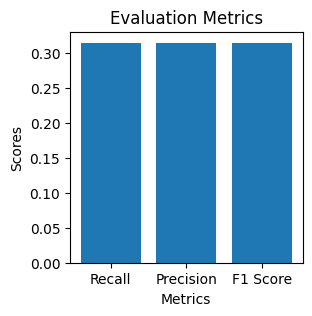

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Calculate recall, precision, and F1 score
recall = recall_score(test_labels, hog_tree_predictions, average='macro')
precision = precision_score(test_labels, hog_tree_predictions, average='macro')
f1 = f1_score(test_labels, hog_tree_predictions, average='macro')

# Print evaluation metrics
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

# Create a bar plot of recall, precision, and F1 score
plt.figure(figsize=(3, 3))
metrics = ['Recall', 'Precision', 'F1 Score']
scores = [recall, precision, f1]
plt.bar(metrics, scores)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metrics')
plt.show()

A model with approximately equal precision, recall, and F1 score indicates that it performs consistently in correctly classifying positive samples and maintaining a balance between false positives and false negatives. It suggests that the model is well-suited for tasks where both precision and recall are important,where both minimizing false positives and false negatives are crucial.

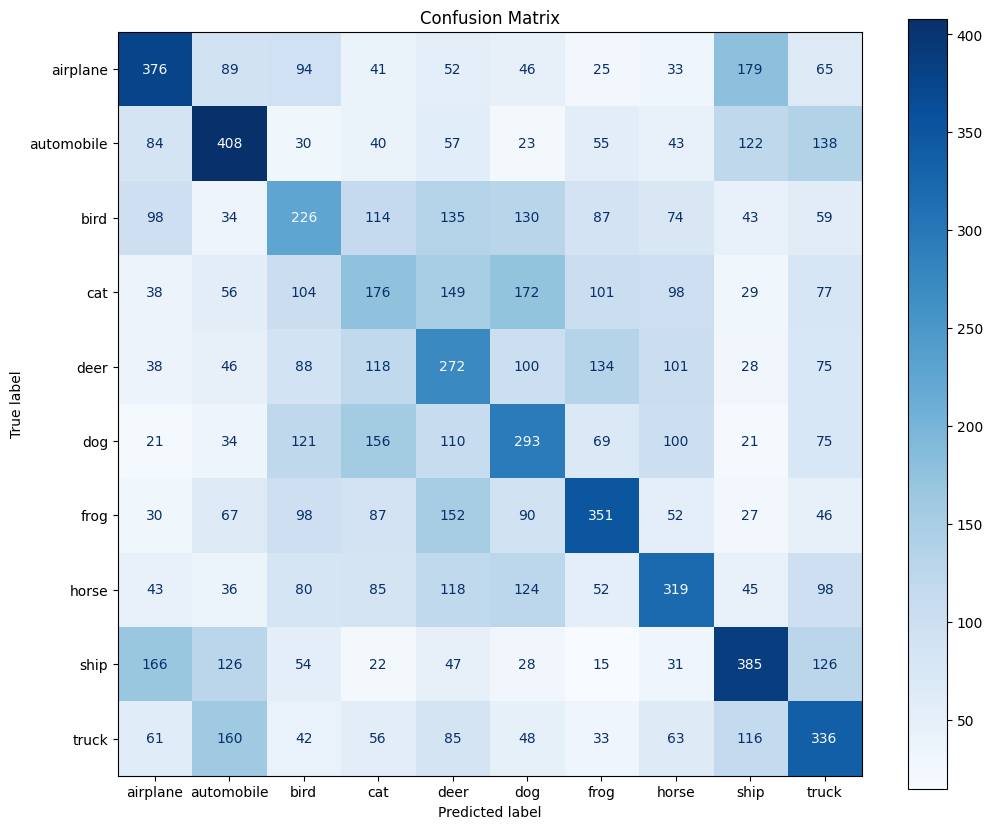

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Compute the confusion matrix
cm = confusion_matrix(test_labels, hog_tree_predictions)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, hog_tree_predictions, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])
fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix")
plt.show()

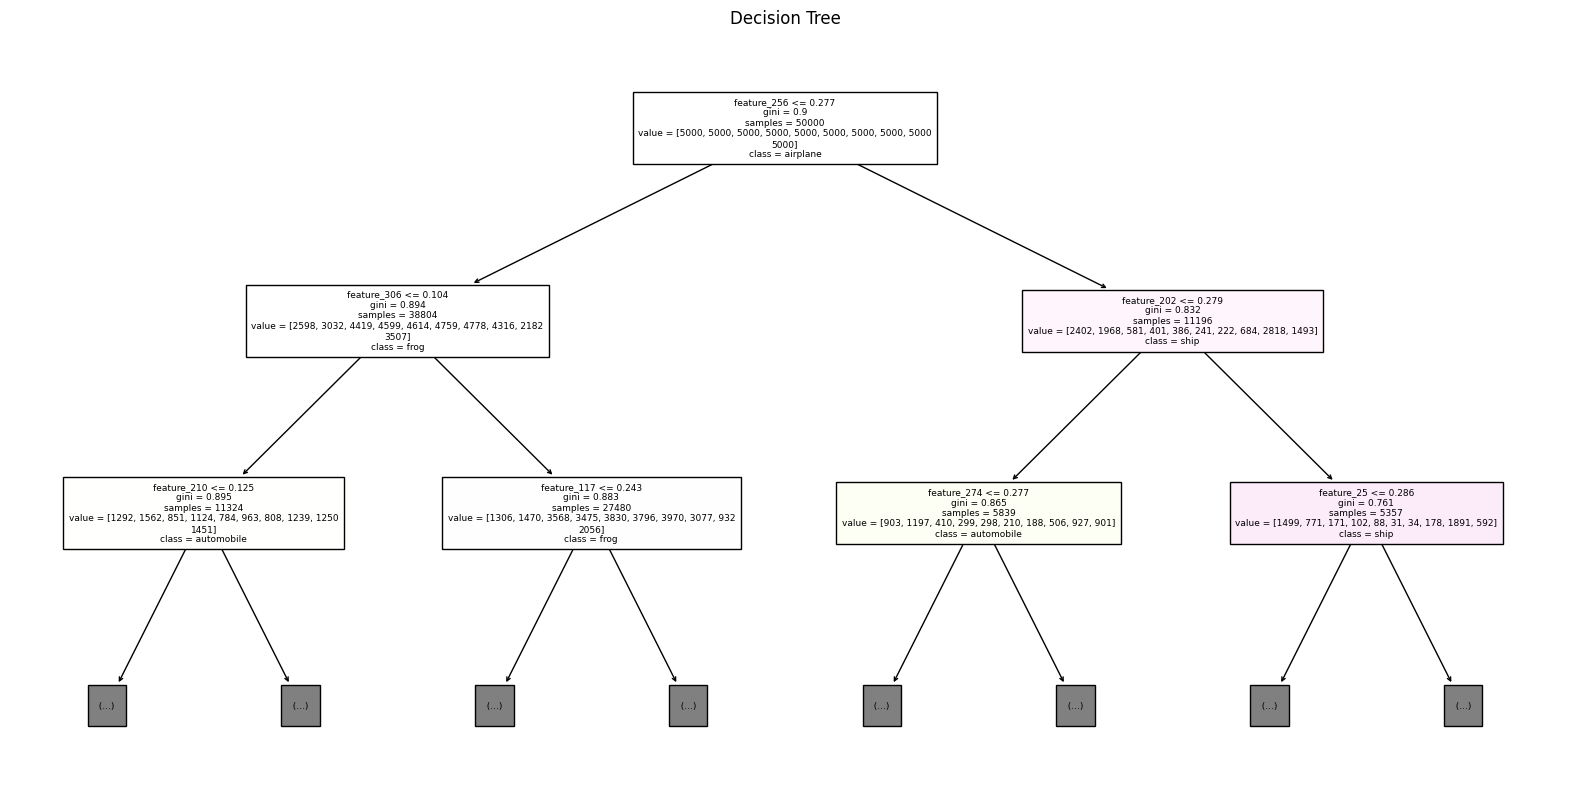

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from time import time

test_labels = test_dataset.targets
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Plot the decision tree up to a certain depth
plt.figure(figsize=(20, 10))
plot_tree(hog_tree, feature_names=["feature_{}".format(i) for i in range(hog_train.shape[1])],
          fontsize=6.5,
          class_names= classes, filled=True, max_depth=2)  # Set the max_depth parameter as desired
plt.title("Decision Tree")
plt.show()
